In [1]:
# import modules we need for EDA and wrangling
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pylab import *
# import other functions we'll need for classification modeling
from sklearn.preprocessing import  MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression # LR
from sklearn.tree import DecisionTreeRegressor # DTR
from sklearn.ensemble import RandomForestRegressor # RFR
from sklearn.ensemble import GradientBoostingRegressor #GBR

from sklearn.tree import DecisionTreeClassifier # DTC
from sklearn.ensemble import RandomForestClassifier  # RFC

# functions we need for the regression error metrics
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

# functions we need for the classification error metrics
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
df = pd.read_csv('/content/drive/MyDrive/datasets/NY-House-Dataset.csv')
df.head(5)

,BROKERTITLE,TYPE,PRICE,BEDS,BATH,PROPERTYSQFT,ADDRESS,STATE,MAIN_ADDRESS,ADMINISTRATIVE_AREA_LEVEL_2,LOCALITY,SUBLOCALITY,STREET_NAME,LONG_NAME,FORMATTED_ADDRESS,LATITUDE,LONGITUDE
0,Brokered by Douglas Elliman -111 Fifth Ave,Condo for sale,315000,2,2.000000,1400.0,2 E 55th St Unit 803,"New York, NY 10022","2 E 55th St Unit 803New York, NY 10022",New York County,New York,Manhattan,East 55th Street,Regis Residence,"Regis Residence, 2 E 55th St #803, New York, N...",40.761255,-73.974483
1,Brokered by Serhant,Condo for sale,195000000,7,10.000000,17545.0,Central Park Tower Penthouse-217 W 57th New Yo...,"New York, NY 10019",Central Park Tower Penthouse-217 W 57th New Yo...,United States,New York,New York County,New York,West 57th Street,"217 W 57th St, New York, NY 10019, USA",40.766393,-73.980991
2,Brokered by Sowae Corp,House for sale,260000,4,2.000000,2015.0,620 Sinclair Ave,"Staten Island, NY 10312","620 Sinclair AveStaten Island, NY 10312",United States,New York,Richmond County,Staten Island,Sinclair Avenue,"620 Sinclair Ave, Staten Island, NY 10312, USA",40.541805,-74.196109
3,Brokered by COMPASS,Condo for sale,69000,3,1.000000,445.0,2 E 55th St Unit 908W33,"Manhattan, NY 10022","2 E 55th St Unit 908W33Manhattan, NY 10022",United States,New York,New York County,New York,East 55th Street,"2 E 55th St, New York, NY 10022, USA",40.761398,-73.974613
4,Brokered by Sotheby's International Realty - E...,Townhouse for sale,55000000,7,2.373861,14175.0,5 E 64th St,"New York, NY 10065","5 E 64th StNew York, NY 10065",United States,New York,New York County,New York,East 64th Street,"5 E 64th St, New York, NY 10065, USA",40.767224,-73.969856


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4801 entries, 0 to 4800
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   BROKERTITLE                  4801 non-null   object 
 1   TYPE                         4801 non-null   object 
 2   PRICE                        4801 non-null   int64  
 3   BEDS                         4801 non-null   int64  
 4   BATH                         4801 non-null   float64
 5   PROPERTYSQFT                 4801 non-null   float64
 6   ADDRESS                      4801 non-null   object 
 7   STATE                        4801 non-null   object 
 8   MAIN_ADDRESS                 4801 non-null   object 
 9   ADMINISTRATIVE_AREA_LEVEL_2  4801 non-null   object 
 10  LOCALITY                     4801 non-null   object 
 11  SUBLOCALITY                  4801 non-null   object 
 12  STREET_NAME                  4801 non-null   object 
 13  LONG_NAME         

In [5]:
df.shape

(4801, 17)

In [6]:
df.columns

Index(['BROKERTITLE', 'TYPE', 'PRICE', 'BEDS', 'BATH', 'PROPERTYSQFT',
       'ADDRESS', 'STATE', 'MAIN_ADDRESS', 'ADMINISTRATIVE_AREA_LEVEL_2',
       'LOCALITY', 'SUBLOCALITY', 'STREET_NAME', 'LONG_NAME',
       'FORMATTED_ADDRESS', 'LATITUDE', 'LONGITUDE'],
      dtype='object')

In [7]:
df.describe()

,PRICE,BEDS,BATH,PROPERTYSQFT,LATITUDE,LONGITUDE
count,4.801000e+03,4801.000000,4801.000000,4801.000000,4801.000000,4801.000000
mean,2.356940e+06,3.356801,2.373861,2184.207862,40.714227,-73.941601
std,3.135525e+07,2.602315,1.946962,2377.140894,0.087676,0.101082
min,2.494000e+03,1.000000,0.000000,230.000000,40.499546,-74.253033
25%,4.990000e+05,2.000000,1.000000,1200.000000,40.639375,-73.987143
50%,8.250000e+05,3.000000,2.000000,2184.207862,40.726749,-73.949189
75%,1.495000e+06,4.000000,3.000000,2184.207862,40.771923,-73.870638
max,2.147484e+09,50.000000,50.000000,65535.000000,40.912729,-73.702450


In [8]:
df.isna().sum()

BROKERTITLE                    0
TYPE                           0
PRICE                          0
BEDS                           0
BATH                           0
PROPERTYSQFT                   0
ADDRESS                        0
STATE                          0
MAIN_ADDRESS                   0
ADMINISTRATIVE_AREA_LEVEL_2    0
LOCALITY                       0
SUBLOCALITY                    0
STREET_NAME                    0
LONG_NAME                      0
FORMATTED_ADDRESS              0
LATITUDE                       0
LONGITUDE                      0
dtype: int64

In [9]:
df['LOCALITY'].unique()   # Unique values for LOCALITY

array(['New York', 'New York County', 'The Bronx', 'Kings County',
       'Bronx County', 'Queens County', 'Richmond County',
       'United States', 'Brooklyn', 'Queens', 'Flatbush'], dtype=object)

In [10]:
df['SUBLOCALITY'].unique()   # Unique values for SUBLOCALITY

array(['Manhattan', 'New York County', 'Richmond County', 'Kings County',
       'New York', 'East Bronx', 'Brooklyn', 'The Bronx', 'Queens',
       'Staten Island', 'Queens County', 'Bronx County', 'Coney Island',
       'Brooklyn Heights', 'Jackson Heights', 'Riverdale', 'Rego Park',
       'Fort Hamilton', 'Flushing', 'Dumbo', 'Snyder Avenue'],
      dtype=object)

In [11]:
df['TYPE'].unique()    # Unique values for TYPE, probably will get standardize to condo, house, townhouse, coop

array(['Condo for sale', 'House for sale', 'Townhouse for sale',
       'Co-op for sale', 'Multi-family home for sale', 'For sale',
       'Contingent', 'Land for sale', 'Foreclosure', 'Pending',
       'Coming Soon', 'Mobile house for sale', 'Condop for sale'],
      dtype=object)

In [12]:
### Some questions to answer:

# How much does square footage affect price?
# How much do rooms affect price?
# What locality and sublocalities are most expensive?
# Does type of housing (ie. house vs condo) affect price ?
# Do certain brokerage accounts sell things for higher average price?

### Some things to do in the dataset:

# Break down STATE column into town and zip code
# Standardize the TYPE column
# Standardize the BROKERTITLE column
# Visualize all the price related items

In [13]:
# Standardize TYPE column by fixing typo 'Condop for sale'

df['TYPE'] = df['TYPE'].replace({'Condop for sale': 'Condo for sale'})
df['TYPE'].unique() # Check

array(['Condo for sale', 'House for sale', 'Townhouse for sale',
       'Co-op for sale', 'Multi-family home for sale', 'For sale',
       'Contingent', 'Land for sale', 'Foreclosure', 'Pending',
       'Coming Soon', 'Mobile house for sale'], dtype=object)

In [14]:
# Continue standardizing TYPE column
df['TYPE'] = df['TYPE'].str.replace('for sale','')
df['TYPE'] = df['TYPE'].str.replace('For sale','Undisclosed')

In [15]:
df['TYPE'].unique() # Double check type column

array(['Condo ', 'House ', 'Townhouse ', 'Co-op ', 'Multi-family home ',
       'Undisclosed', 'Contingent', 'Land ', 'Foreclosure', 'Pending',
       'Coming Soon', 'Mobile house '], dtype=object)

In [16]:
# Standardize BROKERTITLE by getting rid of "Brokered by"
df['BROKERTITLE'] = df['BROKERTITLE'].str.replace('Brokered by','')

In [17]:
df.head(7)

,BROKERTITLE,TYPE,PRICE,BEDS,BATH,PROPERTYSQFT,ADDRESS,STATE,MAIN_ADDRESS,ADMINISTRATIVE_AREA_LEVEL_2,LOCALITY,SUBLOCALITY,STREET_NAME,LONG_NAME,FORMATTED_ADDRESS,LATITUDE,LONGITUDE
0,Douglas Elliman -111 Fifth Ave,Condo,315000,2,2.000000,1400.000000,2 E 55th St Unit 803,"New York, NY 10022","2 E 55th St Unit 803New York, NY 10022",New York County,New York,Manhattan,East 55th Street,Regis Residence,"Regis Residence, 2 E 55th St #803, New York, N...",40.761255,-73.974483
1,Serhant,Condo,195000000,7,10.000000,17545.000000,Central Park Tower Penthouse-217 W 57th New Yo...,"New York, NY 10019",Central Park Tower Penthouse-217 W 57th New Yo...,United States,New York,New York County,New York,West 57th Street,"217 W 57th St, New York, NY 10019, USA",40.766393,-73.980991
2,Sowae Corp,House,260000,4,2.000000,2015.000000,620 Sinclair Ave,"Staten Island, NY 10312","620 Sinclair AveStaten Island, NY 10312",United States,New York,Richmond County,Staten Island,Sinclair Avenue,"620 Sinclair Ave, Staten Island, NY 10312, USA",40.541805,-74.196109
3,COMPASS,Condo,69000,3,1.000000,445.000000,2 E 55th St Unit 908W33,"Manhattan, NY 10022","2 E 55th St Unit 908W33Manhattan, NY 10022",United States,New York,New York County,New York,East 55th Street,"2 E 55th St, New York, NY 10022, USA",40.761398,-73.974613
4,Sotheby's International Realty - East Side Ma...,Townhouse,55000000,7,2.373861,14175.000000,5 E 64th St,"New York, NY 10065","5 E 64th StNew York, NY 10065",United States,New York,New York County,New York,East 64th Street,"5 E 64th St, New York, NY 10065, USA",40.767224,-73.969856
5,Sowae Corp,House,690000,5,2.000000,4004.000000,584 Park Pl,"Brooklyn, NY 11238","584 Park PlBrooklyn, NY 11238",United States,New York,Kings County,Brooklyn,Park Place,"584 Park Pl, Brooklyn, NY 11238, USA",40.674363,-73.958725
6,Douglas Elliman - 575 Madison Ave,Condo,899500,2,2.000000,2184.207862,157 W 126th St Unit 1B,"New York, NY 10027","157 W 126th St Unit 1BNew York, NY 10027",New York,New York County,New York,Manhattan,157,"157 W 126th St #1b, New York, NY 10027, USA",40.809448,-73.946777


In [18]:
# Create new column: "ZIP_CODE" from STATE column

df['ZIP_CODE'] = df['STATE'].str[-5:]
df['ZIP_CODE']

0       10022
1       10019
2       10312
3       10022
4       10065
        ...  
4796    10075
4797    11374
4798    10011
4799    11373
4800    11224
Name: ZIP_CODE, Length: 4801, dtype: object

In [19]:
# Double check df prior to data visualization

df.head(12)

,BROKERTITLE,TYPE,PRICE,BEDS,BATH,PROPERTYSQFT,ADDRESS,STATE,MAIN_ADDRESS,ADMINISTRATIVE_AREA_LEVEL_2,LOCALITY,SUBLOCALITY,STREET_NAME,LONG_NAME,FORMATTED_ADDRESS,LATITUDE,LONGITUDE,ZIP_CODE
0,Douglas Elliman -111 Fifth Ave,Condo,315000,2,2.000000,1400.000000,2 E 55th St Unit 803,"New York, NY 10022","2 E 55th St Unit 803New York, NY 10022",New York County,New York,Manhattan,East 55th Street,Regis Residence,"Regis Residence, 2 E 55th St #803, New York, N...",40.761255,-73.974483,10022
1,Serhant,Condo,195000000,7,10.000000,17545.000000,Central Park Tower Penthouse-217 W 57th New Yo...,"New York, NY 10019",Central Park Tower Penthouse-217 W 57th New Yo...,United States,New York,New York County,New York,West 57th Street,"217 W 57th St, New York, NY 10019, USA",40.766393,-73.980991,10019
2,Sowae Corp,House,260000,4,2.000000,2015.000000,620 Sinclair Ave,"Staten Island, NY 10312","620 Sinclair AveStaten Island, NY 10312",United States,New York,Richmond County,Staten Island,Sinclair Avenue,"620 Sinclair Ave, Staten Island, NY 10312, USA",40.541805,-74.196109,10312
3,COMPASS,Condo,69000,3,1.000000,445.000000,2 E 55th St Unit 908W33,"Manhattan, NY 10022","2 E 55th St Unit 908W33Manhattan, NY 10022",United States,New York,New York County,New York,East 55th Street,"2 E 55th St, New York, NY 10022, USA",40.761398,-73.974613,10022
4,Sotheby's International Realty - East Side Ma...,Townhouse,55000000,7,2.373861,14175.000000,5 E 64th St,"New York, NY 10065","5 E 64th StNew York, NY 10065",United States,New York,New York County,New York,East 64th Street,"5 E 64th St, New York, NY 10065, USA",40.767224,-73.969856,10065
5,Sowae Corp,House,690000,5,2.000000,4004.000000,584 Park Pl,"Brooklyn, NY 11238","584 Park PlBrooklyn, NY 11238",United States,New York,Kings County,Brooklyn,Park Place,"584 Park Pl, Brooklyn, NY 11238, USA",40.674363,-73.958725,11238
6,Douglas Elliman - 575 Madison Ave,Condo,899500,2,2.000000,2184.207862,157 W 126th St Unit 1B,"New York, NY 10027","157 W 126th St Unit 1BNew York, NY 10027",New York,New York County,New York,Manhattan,157,"157 W 126th St #1b, New York, NY 10027, USA",40.809448,-73.946777,10027
7,Connie Profaci Realty,House,16800000,8,16.000000,33000.000000,177 Benedict Rd,"Staten Island, NY 10304","177 Benedict RdStaten Island, NY 10304",United States,New York,Richmond County,Staten Island,Benedict Road,"177 Benedict Rd, Staten Island, NY 10304, USA",40.595002,-74.106424,10304
8,Pantiga Group Inc.,Co-op,265000,1,1.000000,750.000000,875 Morrison Ave Apt 3M,"Bronx, NY 10473","875 Morrison Ave Apt 3MBronx, NY 10473",Bronx County,The Bronx,East Bronx,Morrison Avenue,Parking lot,"Parking lot, 875 Morrison Ave #3m, Bronx, NY 1...",40.821586,-73.874089,10473
9,CENTURY 21 MK Realty,Co-op,440000,2,1.000000,978.000000,1350 Ocean Pkwy Apt 5G,"Brooklyn, NY 11230","1350 Ocean Pkwy Apt 5GBrooklyn, NY 11230",New York,Kings County,Brooklyn,Midwood,1350,"1350 Ocean Pkwy #5g, Brooklyn, NY 11230, USA",40.615738,-73.969694,11230


In [20]:
df.describe()

,PRICE,BEDS,BATH,PROPERTYSQFT,LATITUDE,LONGITUDE
count,4.801000e+03,4801.000000,4801.000000,4801.000000,4801.000000,4801.000000
mean,2.356940e+06,3.356801,2.373861,2184.207862,40.714227,-73.941601
std,3.135525e+07,2.602315,1.946962,2377.140894,0.087676,0.101082
min,2.494000e+03,1.000000,0.000000,230.000000,40.499546,-74.253033
25%,4.990000e+05,2.000000,1.000000,1200.000000,40.639375,-73.987143
50%,8.250000e+05,3.000000,2.000000,2184.207862,40.726749,-73.949189
75%,1.495000e+06,4.000000,3.000000,2184.207862,40.771923,-73.870638
max,2.147484e+09,50.000000,50.000000,65535.000000,40.912729,-73.702450


In [21]:
# What is this outlier?

df['PRICE'].max()

2147483647

In [22]:
df.loc[df['PRICE'] == 2147483647]

# This is an extreme outlier

,BROKERTITLE,TYPE,PRICE,BEDS,BATH,PROPERTYSQFT,ADDRESS,STATE,MAIN_ADDRESS,ADMINISTRATIVE_AREA_LEVEL_2,LOCALITY,SUBLOCALITY,STREET_NAME,LONG_NAME,FORMATTED_ADDRESS,LATITUDE,LONGITUDE,ZIP_CODE
304,ANNE LOPA REAL ESTATE,House,2147483647,7,6.0,10000.0,6659-6675 Amboy Rd,"New York, NY 10309","6659-6675 Amboy RdNew York, NY 10309",United States,New York,Richmond County,Staten Island,Amboy Road,"6659 Amboy Rd, Staten Island, NY 10309, USA",40.518484,-74.224418,10309


In [23]:
# Drop the extreme outliers, leave any property below $100,000,000

df = df.loc[df['PRICE'] < 100000000]
df

,BROKERTITLE,TYPE,PRICE,BEDS,BATH,PROPERTYSQFT,ADDRESS,STATE,MAIN_ADDRESS,ADMINISTRATIVE_AREA_LEVEL_2,LOCALITY,SUBLOCALITY,STREET_NAME,LONG_NAME,FORMATTED_ADDRESS,LATITUDE,LONGITUDE,ZIP_CODE
0,Douglas Elliman -111 Fifth Ave,Condo,315000,2,2.000000,1400.000000,2 E 55th St Unit 803,"New York, NY 10022","2 E 55th St Unit 803New York, NY 10022",New York County,New York,Manhattan,East 55th Street,Regis Residence,"Regis Residence, 2 E 55th St #803, New York, N...",40.761255,-73.974483,10022
2,Sowae Corp,House,260000,4,2.000000,2015.000000,620 Sinclair Ave,"Staten Island, NY 10312","620 Sinclair AveStaten Island, NY 10312",United States,New York,Richmond County,Staten Island,Sinclair Avenue,"620 Sinclair Ave, Staten Island, NY 10312, USA",40.541805,-74.196109,10312
3,COMPASS,Condo,69000,3,1.000000,445.000000,2 E 55th St Unit 908W33,"Manhattan, NY 10022","2 E 55th St Unit 908W33Manhattan, NY 10022",United States,New York,New York County,New York,East 55th Street,"2 E 55th St, New York, NY 10022, USA",40.761398,-73.974613,10022
4,Sotheby's International Realty - East Side Ma...,Townhouse,55000000,7,2.373861,14175.000000,5 E 64th St,"New York, NY 10065","5 E 64th StNew York, NY 10065",United States,New York,New York County,New York,East 64th Street,"5 E 64th St, New York, NY 10065, USA",40.767224,-73.969856,10065
5,Sowae Corp,House,690000,5,2.000000,4004.000000,584 Park Pl,"Brooklyn, NY 11238","584 Park PlBrooklyn, NY 11238",United States,New York,Kings County,Brooklyn,Park Place,"584 Park Pl, Brooklyn, NY 11238, USA",40.674363,-73.958725,11238
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4796,COMPASS,Co-op,599000,1,1.000000,2184.207862,222 E 80th St Apt 3A,"Manhattan, NY 10075","222 E 80th St Apt 3AManhattan, NY 10075",New York,New York County,New York,Manhattan,222,"222 E 80th St #3a, New York, NY 10075, USA",40.774350,-73.955879,10075
4797,Mjr Real Estate Llc,Co-op,245000,1,1.000000,2184.207862,97-40 62 Dr Unit Lg,"Rego Park, NY 11374","97-40 62 Dr Unit LgRego Park, NY 11374",United States,New York,Queens County,Queens,62nd Drive,"97-40 62nd Dr, Rego Park, NY 11374, USA",40.732538,-73.860152,11374
4798,Douglas Elliman - 575 Madison Ave,Co-op,1275000,1,1.000000,2184.207862,427 W 21st St Unit Garden,"New York, NY 10011","427 W 21st St Unit GardenNew York, NY 10011",United States,New York,New York County,New York,West 21st Street,"427 W 21st St, New York, NY 10011, USA",40.745882,-74.003398,10011
4799,E Realty International Corp,Condo,598125,2,1.000000,655.000000,91-23 Corona Ave Unit 4G,"Elmhurst, NY 11373","91-23 Corona Ave Unit 4GElmhurst, NY 11373",New York,Queens County,Queens,Flushing,91-23,"91-23 Corona Ave. #4b, Flushing, NY 11373, USA",40.742770,-73.872752,11373


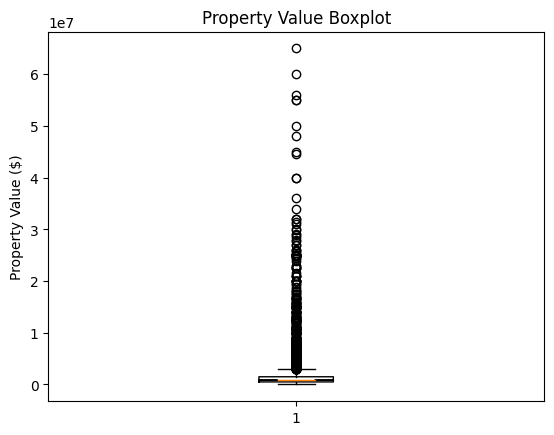

In [24]:
plt.boxplot(x = 'PRICE', data = df, notch = True)
plt.ylabel("Property Value ($)")
plt.title("Property Value Boxplot")
plt.show()

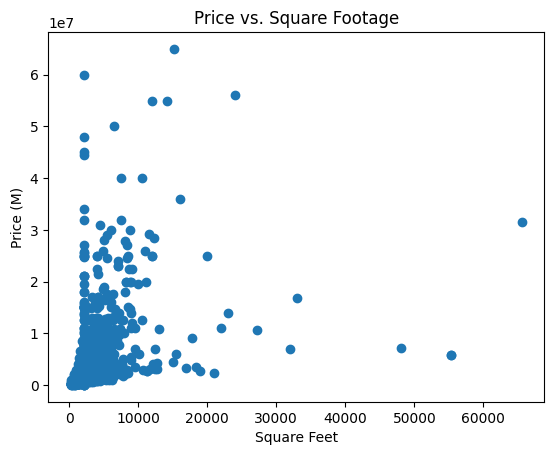

In [25]:
# How much does square footage affect price?

plt.scatter(x= 'PROPERTYSQFT', y = 'PRICE', data = df)
plt.title("Price vs. Square Footage")
plt.xlabel("Square Feet")
plt.ylabel("Price (M)")
plt.show()

In [26]:
price_by_hometype = df.groupby(['TYPE'])['PRICE'].mean().reset_index()
price_by_hometype.sort_values(by ='PRICE')

,TYPE,PRICE
3,Contingent,8.825717e+05
6,Land,1.073021e+06
0,Co-op,1.100418e+06
1,Coming Soon,1.172000e+06
7,Mobile house,1.288000e+06
9,Pending,1.340867e+06
4,Foreclosure,1.343010e+06
5,House,1.563741e+06
8,Multi-family home,1.680428e+06
11,Undisclosed,1.954536e+06


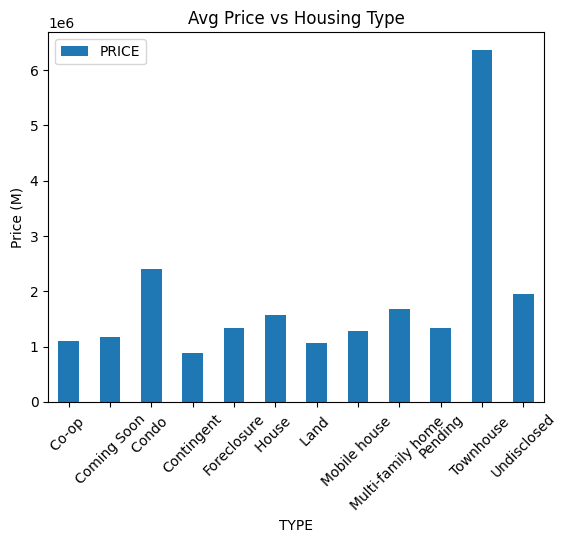

In [27]:
# Does type of housing (ie. house vs condo) affect price ?

price_by_hometype.plot(kind = 'bar', x = 'TYPE', y= 'PRICE')
plt.xticks(rotation  = 45)
plt.title('Avg Price vs Housing Type')
plt.ylabel('Price (M)')
plt.show()

# Townhouses have the highest average price in this dataset

In [28]:
# Do certain brokerage accounts sell things for higher average price or more than others?

num_listings_broker = df.groupby(['BROKERTITLE'])['TYPE'].count().reset_index()
num_listings_broker['NUM_LISTINGS'] = num_listings_broker['TYPE']
num_listings_broker = num_listings_broker.drop(columns = ['TYPE'])
num_listings_broker

,BROKERTITLE,NUM_LISTINGS
0,1 Oak Real Estate Hub Inc,1
1,5 Boro Realty Corp,17
2,A J Realty Of Queens Inc,1
3,A P Services Inc,1
4,AAA Young Shuen Realty Inc,2
...,...,...
1030,eXp Realty BKNY,14
1031,eXp Realty NYC,4
1032,qvtopservice,8
1033,Built by Toll Brothers,3


In [29]:
# How much do rooms affect price?

room_df = df.loc[:, ['TYPE','BEDS', 'BATH', 'PRICE',]]
room_df.describe()

,BEDS,BATH,PRICE
count,4799.000000,4799.000000,4.799000e+03
mean,3.355282,2.371516,1.869803e+06
std,2.601794,1.943546,4.065642e+06
min,1.000000,0.000000,2.494000e+03
25%,2.000000,1.000000,4.990000e+05
50%,3.000000,2.000000,8.250000e+05
75%,4.000000,3.000000,1.495000e+06
max,50.000000,50.000000,6.500000e+07


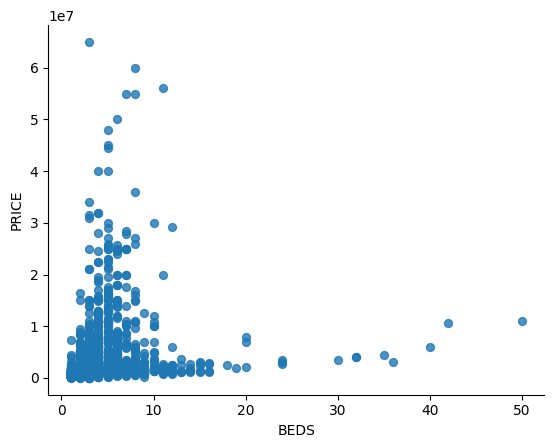

In [30]:
df.plot(kind='scatter', x='BEDS', y='PRICE', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

Text(0.5, 1.0, 'Price vs. # of Bedrooms')

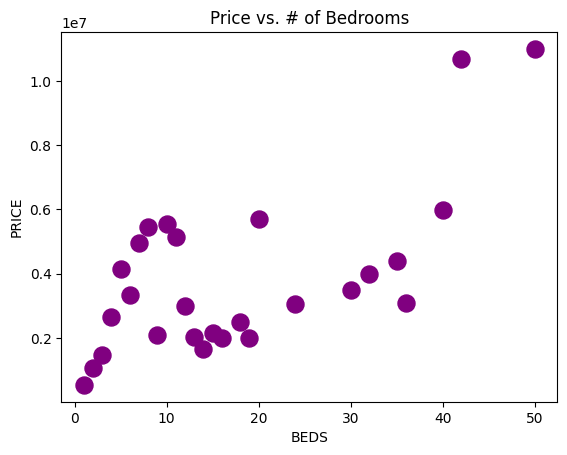

In [31]:
# Bedroom affecting price visualizations

bd_by_price = room_df.groupby(['BEDS'])['PRICE'].mean().reset_index()
bd_by_price.plot(x = 'BEDS', y='PRICE', kind='scatter', s = 150, c= 'purple')
plt.title('Price vs. # of Bedrooms')

In [32]:
room_df.groupby(['BEDS'])['PRICE'].agg({'min','max','mean'}).head(5)

,mean,min,max
BEDS,,,
1,5.337822e+05,69000,7250000
2,1.046006e+06,2494,16500000
3,1.462133e+06,3225,65000000
4,2.653452e+06,187000,39995000
5,4.150148e+06,250000,48000000


In [33]:
plt.style.use('fivethirtyeight')

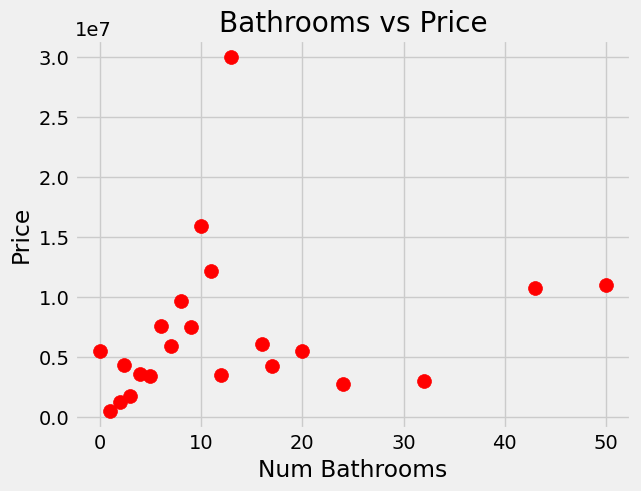

In [34]:
# Bathroom vs price analysis and visualizations:

br_by_price = room_df.groupby(['BATH'])['PRICE'].mean().reset_index()
br_by_price.plot(x= 'BATH', y= 'PRICE', kind = 'scatter', s= 100, c = 'red')
plt.title("Bathrooms vs Price")
plt.xlabel('Num Bathrooms')
plt.ylabel("Price")
plt.show()

In [35]:
# What locality and sublocalities are most expensive?

print("Locality unique values:", df['LOCALITY'].nunique())
print("Sublocality unique values:", df['SUBLOCALITY'].nunique())

Locality unique values: 11
Sublocality unique values: 21


In [36]:
locality = df.loc[:, ['LOCALITY','SUBLOCALITY','PRICE', 'ADDRESS']]
locality.head(5)

,LOCALITY,SUBLOCALITY,PRICE,ADDRESS
0,New York,Manhattan,315000,2 E 55th St Unit 803
2,New York,Richmond County,260000,620 Sinclair Ave
3,New York,New York County,69000,2 E 55th St Unit 908W33
4,New York,New York County,55000000,5 E 64th St
5,New York,Kings County,690000,584 Park Pl


In [37]:
df['LOCALITY'].unique()

array(['New York', 'New York County', 'The Bronx', 'Kings County',
       'Bronx County', 'Queens County', 'Richmond County',
       'United States', 'Brooklyn', 'Queens', 'Flatbush'], dtype=object)

In [38]:
df['SUBLOCALITY'].unique()

array(['Manhattan', 'Richmond County', 'New York County', 'Kings County',
       'New York', 'East Bronx', 'Brooklyn', 'The Bronx', 'Queens',
       'Staten Island', 'Queens County', 'Bronx County', 'Coney Island',
       'Brooklyn Heights', 'Jackson Heights', 'Riverdale', 'Rego Park',
       'Fort Hamilton', 'Flushing', 'Dumbo', 'Snyder Avenue'],
      dtype=object)

In [39]:
locality_pivot = locality.groupby(['LOCALITY'])['PRICE'].agg({'min','max','mean'}).reset_index()
locality_pivot

,LOCALITY,mean,min,max
0,Bronx County,3.376565e+05,49500,1995000
1,Brooklyn,1.426167e+06,429000,5799000
2,Flatbush,6.500000e+05,650000,650000
3,Kings County,8.646435e+05,5800,14995000
4,New York,2.256825e+06,69000,65000000
5,New York County,2.579619e+06,2494,60000000
6,Queens,5.173333e+05,215000,985000
7,Queens County,4.430085e+05,100000,1850000
8,Richmond County,4.475819e+05,109500,1799000
9,The Bronx,3.306000e+05,235000,429000


<Axes: xlabel='LOCALITY'>

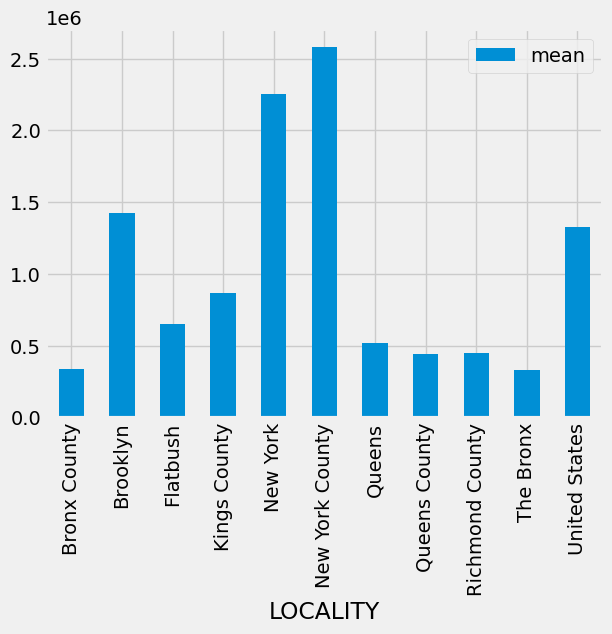

In [40]:
locality_pivot.plot(x= 'LOCALITY', y= 'mean', kind = 'bar')

In [41]:
sublocality_pivot = locality.groupby(['SUBLOCALITY'])['PRICE'].agg({'min','max','mean'}).reset_index()
sublocality_pivot

,SUBLOCALITY,mean,min,max
0,Bronx County,1.020866e+06,69900,14000000
1,Brooklyn,8.646435e+05,5800,14995000
2,Brooklyn Heights,6.250000e+05,625000,625000
3,Coney Island,5.113333e+05,429000,615000
4,Dumbo,5.799000e+06,5799000,5799000
5,East Bronx,2.650000e+05,265000,265000
6,Flushing,4.760000e+05,299000,699000
7,Fort Hamilton,5.990000e+05,599000,599000
8,Jackson Heights,9.850000e+05,985000,985000
9,Kings County,1.795465e+06,199999,31500000


<Axes: xlabel='SUBLOCALITY'>

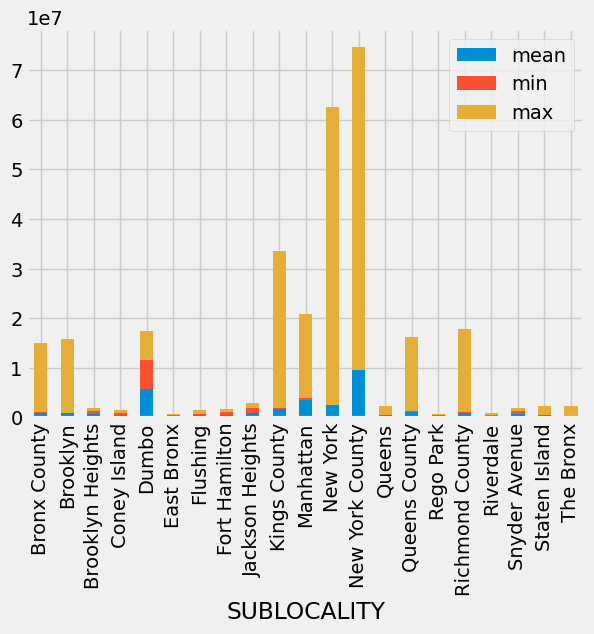

In [42]:
sublocality_pivot.plot(x= 'SUBLOCALITY', kind = 'bar', stacked = True)

<Axes: xlabel='SUBLOCALITY'>

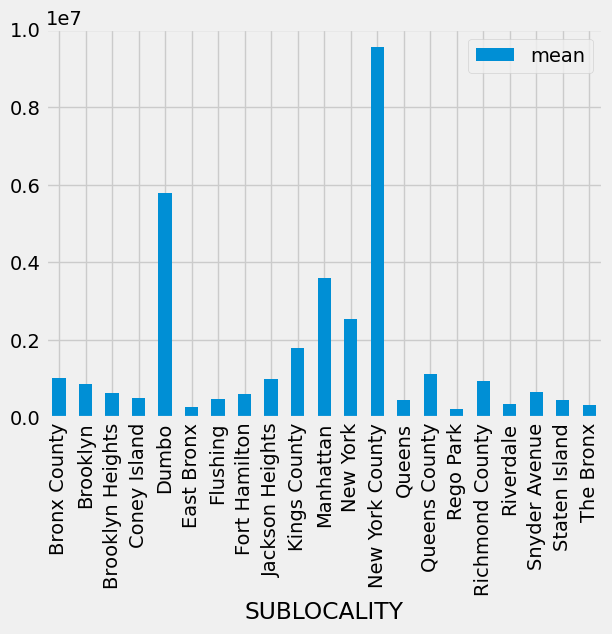

In [45]:
sublocality_pivot.plot(x= 'SUBLOCALITY', y = 'mean', kind = 'bar')